# Prepare rules for the all the data sets 
1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values
2) Change the minimum length in apriori algorithm
3) Visulize the obtained rules using different plots 


# Association Rules For Book dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.frequent_patterns import apriori,association_rules


In [2]:
book_df = pd.read_csv('book.csv')

***
**`EDA (book dataset):`**
***

In [3]:
book_df.head(10)

,ChildBks,YouthBks,CookBks,DoItYBks,RefBks,ArtBks,GeogBks,ItalCook,ItalAtlas,ItalArt,Florence
0,0,1,0,1,0,0,1,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,1,0,1,0,0,0,0
4,0,0,1,0,0,0,1,0,0,0,0
5,1,0,0,0,0,1,0,0,0,0,1
6,0,1,0,0,0,0,0,0,0,0,0
7,0,1,0,0,1,0,0,0,0,0,0
8,1,0,0,1,0,0,0,0,0,0,0
9,1,1,1,0,0,0,1,0,0,0,0


In [4]:
book_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   ChildBks   2000 non-null   int64
 1   YouthBks   2000 non-null   int64
 2   CookBks    2000 non-null   int64
 3   DoItYBks   2000 non-null   int64
 4   RefBks     2000 non-null   int64
 5   ArtBks     2000 non-null   int64
 6   GeogBks    2000 non-null   int64
 7   ItalCook   2000 non-null   int64
 8   ItalAtlas  2000 non-null   int64
 9   ItalArt    2000 non-null   int64
 10  Florence   2000 non-null   int64
dtypes: int64(11)
memory usage: 172.0 KB


In [5]:
book_df.isna().sum()

ChildBks     0
YouthBks     0
CookBks      0
DoItYBks     0
RefBks       0
ArtBks       0
GeogBks      0
ItalCook     0
ItalAtlas    0
ItalArt      0
Florence     0
dtype: int64

In [6]:
book_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ChildBks,2000.0,0.4230,0.494159,0.0,0.0,0.0,1.0,1.0
YouthBks,2000.0,0.2475,0.431668,0.0,0.0,0.0,0.0,1.0
CookBks,2000.0,0.4310,0.495340,0.0,0.0,0.0,1.0,1.0
DoItYBks,2000.0,0.2820,0.450086,0.0,0.0,0.0,1.0,1.0
RefBks,2000.0,0.2145,0.410578,0.0,0.0,0.0,0.0,1.0
ArtBks,2000.0,0.2410,0.427797,0.0,0.0,0.0,0.0,1.0
GeogBks,2000.0,0.2760,0.447129,0.0,0.0,0.0,1.0,1.0
ItalCook,2000.0,0.1135,0.317282,0.0,0.0,0.0,0.0,1.0
ItalAtlas,2000.0,0.0370,0.188809,0.0,0.0,0.0,0.0,1.0
ItalArt,2000.0,0.0485,0.214874,0.0,0.0,0.0,0.0,1.0


***
**Initial Visulaization for book dataset**
***

In [7]:
#Finding most popular books 
count = book_df.loc[:,:].sum()
count

ChildBks     846
YouthBks     495
CookBks      862
DoItYBks     564
RefBks       429
ArtBks       482
GeogBks      552
ItalCook     227
ItalAtlas     74
ItalArt       97
Florence     217
dtype: int64

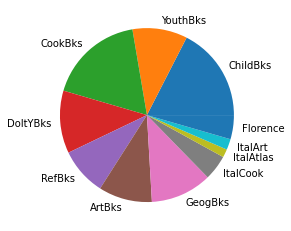

In [8]:
plt.pie(book_df.sum(),labels=book_df.columns);

In [9]:
# Here we can see that Child book ,Cook Book are most popular books.Books for Italian Art and Italian Atlas,Italian Cook 
# least popular books

***
**`Apriori Algorithm(book dataset)`**
***

In [10]:
frequent_itemset = apriori(book_df,min_support=0.003,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
1376,0.0050,"(GeogBks, DoItYBks, RefBks, ArtBks, CookBks, I..."
1377,0.0030,"(YouthBks, GeogBks, DoItYBks, RefBks, ArtBks, ..."
1378,0.0040,"(YouthBks, DoItYBks, RefBks, ArtBks, ChildBks,..."
1379,0.0040,"(YouthBks, GeogBks, RefBks, ArtBks, ChildBks, ..."


In [11]:
frequent_itemset.sort_values(by='support',ascending=False).head(10)

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
1,0.2475,(YouthBks)
5,0.2410,(ArtBks)
4,0.2145,(RefBks)
16,0.1950,"(GeogBks, ChildBks)"
33,0.1925,"(GeogBks, CookBks)"


In [12]:
#As per support values Cook books,Child Books ,DoItY books and Geo Books are popular.Association between Cook book
# is good with Child book and Geo books as per support values.


In [13]:
frequent_itemset = apriori(book_df,min_support=0.1,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
5,0.2410,(ArtBks)
6,0.2760,(GeogBks)
7,0.1135,(ItalCook)
8,0.1085,(Florence)
9,0.1650,"(YouthBks, ChildBks)"


In [14]:
frequent_itemset.shape

(39, 2)

In [15]:
frequent_itemset = apriori(book_df,min_support=0.003,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
1376,0.0050,"(GeogBks, DoItYBks, RefBks, ArtBks, CookBks, I..."
1377,0.0030,"(YouthBks, GeogBks, DoItYBks, RefBks, ArtBks, ..."
1378,0.0040,"(YouthBks, DoItYBks, RefBks, ArtBks, ChildBks,..."
1379,0.0040,"(YouthBks, GeogBks, RefBks, ArtBks, ChildBks, ..."


In [16]:
frequent_itemset = apriori(book_df,min_support=0.005,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
1057,0.0060,"(YouthBks, RefBks, ArtBks, ChildBks, CookBks, ..."
1058,0.0050,"(GeogBks, DoItYBks, RefBks, ArtBks, ChildBks, ..."
1059,0.0065,"(DoItYBks, RefBks, ArtBks, ChildBks, CookBks, ..."
1060,0.0080,"(GeogBks, RefBks, ArtBks, ChildBks, CookBks, I..."


In [17]:
frequent_itemset = apriori(book_df,min_support=0.009,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
672,0.0095,"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks,..."
673,0.0105,"(GeogBks, DoItYBks, ArtBks, ChildBks, CookBks,..."
674,0.0100,"(GeogBks, RefBks, ArtBks, ChildBks, CookBks, I..."
675,0.0110,"(RefBks, ArtBks, ChildBks, CookBks, ItalCook, ..."


In [18]:
frequent_itemset = apriori(book_df,min_support=0.01,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
589,0.0125,"(RefBks, ArtBks, CookBks, ItalAtlas, ItalCook,..."
590,0.0145,"(YouthBks, GeogBks, DoItYBks, RefBks, ArtBks, ..."
591,0.0105,"(GeogBks, DoItYBks, ArtBks, ChildBks, CookBks,..."
592,0.0100,"(GeogBks, RefBks, ArtBks, ChildBks, CookBks, I..."


In [19]:
frequent_itemset = apriori(book_df,min_support=0.03,use_colnames=True)
frequent_itemset

C:\Users\Vaibhavi\AppData\Roaming\Python\Python39\site-packages\mlxtend\frequent_patterns\fpcommon.py:111: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


,support,itemsets
0,0.4230,(ChildBks)
1,0.2475,(YouthBks)
2,0.4310,(CookBks)
3,0.2820,(DoItYBks)
4,0.2145,(RefBks)
...,...,...
176,0.0535,"(GeogBks, DoItYBks, ArtBks, ChildBks, CookBks)"
177,0.0405,"(GeogBks, RefBks, ArtBks, ChildBks, CookBks)"
178,0.0300,"(GeogBks, ArtBks, ChildBks, CookBks, ItalCook)"
179,0.0370,"(YouthBks, GeogBks, DoItYBks, ArtBks, CookBks)"


In [20]:
frequent_itemset.shape

(181, 2)

In [21]:
frequent_itemset.sort_values(by='support',ascending=False).head(30)

,support,itemsets
2,0.4310,(CookBks)
0,0.4230,(ChildBks)
3,0.2820,(DoItYBks)
6,0.2760,(GeogBks)
12,0.2560,"(ChildBks, CookBks)"
1,0.2475,(YouthBks)
5,0.2410,(ArtBks)
4,0.2145,(RefBks)
16,0.1950,"(GeogBks, ChildBks)"
29,0.1925,"(GeogBks, CookBks)"


***
**Creating rule using Support as metric**
***

In [22]:
rules_metric_support = association_rules(frequent_itemset,metric='support',min_threshold=0.01)
rules_metric_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1671,(GeogBks),"(YouthBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0445,0.031,0.112319,2.524019,0.018718,1.076400
1672,(DoItYBks),"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263
1673,(ArtBks),"(YouthBks, GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090
1674,(ChildBks),"(YouthBks, GeogBks, DoItYBks, ArtBks, CookBks)",0.4230,0.0370,0.031,0.073286,1.980704,0.015349,1.039156


In [23]:
rules_metric_support = association_rules(frequent_itemset,metric='support',min_threshold=0.03)
rules_metric_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1671,(GeogBks),"(YouthBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0445,0.031,0.112319,2.524019,0.018718,1.076400
1672,(DoItYBks),"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263
1673,(ArtBks),"(YouthBks, GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090
1674,(ChildBks),"(YouthBks, GeogBks, DoItYBks, ArtBks, CookBks)",0.4230,0.0370,0.031,0.073286,1.980704,0.015349,1.039156


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

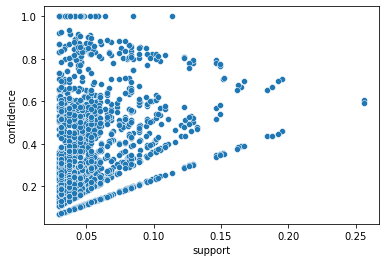

In [24]:
sns.scatterplot('support','confidence',data=rules_metric_support)

In [25]:
rules_metric_support[(rules_metric_support['support']>0.15)&(rules_metric_support['confidence']>0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
5,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
18,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
31,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
32,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556
34,(ArtBks),(CookBks),0.2410,0.431,0.1670,0.692946,1.607763,0.063129,1.853095


In [26]:
#Association of child books is good with YouthBooks ,DoItY books,Geog Books
#Association of cook books are associated with good with YouthBooks ,DoItY books,Ref Books

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

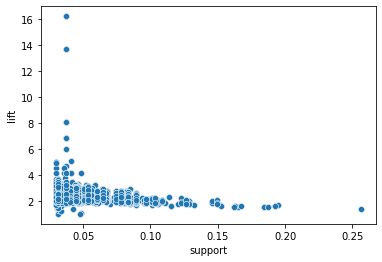

In [27]:
sns.scatterplot('support','lift',data=rules_metric_support)

In [28]:
rules_metric_support[(rules_metric_support['support']>0.15)&(rules_metric_support['lift']>1.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
5,(DoItYBks),(ChildBks),0.2820,0.4230,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.4230,0.1515,0.706294,1.669725,0.060767,1.964548
7,(ChildBks),(RefBks),0.4230,0.2145,0.1515,0.358156,1.669725,0.060767,1.223818
8,(ArtBks),(ChildBks),0.2410,0.4230,0.1625,0.674274,1.594028,0.060557,1.771427
9,(ChildBks),(ArtBks),0.4230,0.2410,0.1625,0.384161,1.594028,0.060557,1.232464
10,(GeogBks),(ChildBks),0.2760,0.4230,0.1950,0.706522,1.670264,0.078252,1.966074
11,(ChildBks),(GeogBks),0.4230,0.2760,0.1950,0.460993,1.670264,0.078252,1.343211


In [29]:
rules_metric_support[(rules_metric_support['support']>0.1)&(rules_metric_support['lift']>2.2)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
38,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
39,(CookBks),(ItalCook),0.4310,0.1135,0.1135,0.263341,2.320186,0.064582,1.203406
124,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
125,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
202,"(ArtBks, ChildBks)",(GeogBks),0.1625,0.2760,0.1020,0.627692,2.274247,0.057150,1.944628
203,(GeogBks),"(ArtBks, ChildBks)",0.2760,0.1625,0.1020,0.369565,2.274247,0.057150,1.328448
328,"(CookBks, DoItYBks)",(ArtBks),0.1875,0.2410,0.1015,0.541333,2.246196,0.056313,1.654797
329,(ArtBks),"(CookBks, DoItYBks)",0.2410,0.1875,0.1015,0.421162,2.246196,0.056313,1.403674
363,"(GeogBks, CookBks)",(ArtBks),0.1925,0.2410,0.1035,0.537662,2.230964,0.057107,1.641657
364,"(ArtBks, CookBks)",(GeogBks),0.1670,0.2760,0.1035,0.619760,2.245509,0.057408,1.904063


In [30]:
#Ref books having good association with Cook books and Child Books
#Ital(Italian) Cook books are associated with Cook books


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='confidence'>

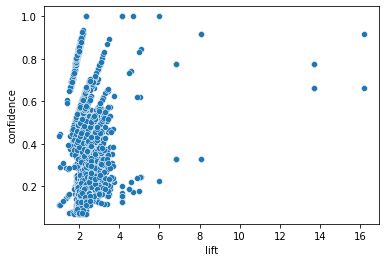

In [31]:
sns.scatterplot('lift','confidence',data=rules_metric_support)

In [32]:
rules_metric_support[(rules_metric_support['confidence']>0.9)&(rules_metric_support['lift']>4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
62,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
71,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
214,"(ChildBks, ItalArt)",(ArtBks),0.0360,0.2410,0.0360,1.000000,4.149378,0.027324,inf
376,"(CookBks, ItalArt)",(ArtBks),0.0410,0.2410,0.0410,1.000000,4.149378,0.031119,inf
400,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
430,"(ItalArt, DoItYBks)",(ArtBks),0.0300,0.2410,0.0300,1.000000,4.149378,0.022770,inf
459,"(ItalCook, ItalArt)",(ArtBks),0.0375,0.2410,0.0375,1.000000,4.149378,0.028463,inf
761,"(ChildBks, ItalArt, CookBks)",(ArtBks),0.0300,0.2410,0.0300,1.000000,4.149378,0.022770,inf
1138,"(ItalCook, CookBks, ItalArt)",(ArtBks),0.0375,0.2410,0.0375,1.000000,4.149378,0.028463,inf
1139,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714


In [33]:
#ItalArt Books and Cook books are having good association with ItalCookBooks and Art Books

In [34]:
rules_metric_support = association_rules(frequent_itemset,metric='support',min_threshold=0.08)
rules_metric_support

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.1650,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.1650,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.2560,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.1840,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
249,"(ChildBks, CookBks)","(GeogBks, ArtBks)",0.2560,0.1275,0.0835,0.326172,2.558211,0.050860,1.294841
250,(GeogBks),"(ArtBks, ChildBks, CookBks)",0.2760,0.1265,0.0835,0.302536,2.391591,0.048586,1.252395
251,(ArtBks),"(GeogBks, ChildBks, CookBks)",0.2410,0.1495,0.0835,0.346473,2.317545,0.047471,1.301400
252,(ChildBks),"(GeogBks, ArtBks, CookBks)",0.4230,0.1035,0.0835,0.197400,1.907242,0.039720,1.116994


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

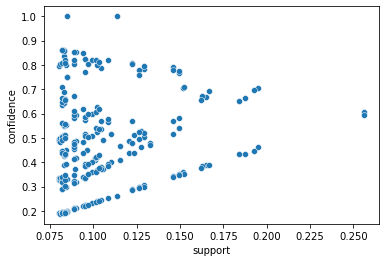

In [35]:
sns.scatterplot('support','confidence',data=rules_metric_support)

In [36]:
rules_metric_support[(rules_metric_support['support']>0.15)&(rules_metric_support['confidence']>0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
5,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
14,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
25,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
26,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


In [37]:
#Child books are associated with cook books 
#Cook books are associated with Geog Books


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

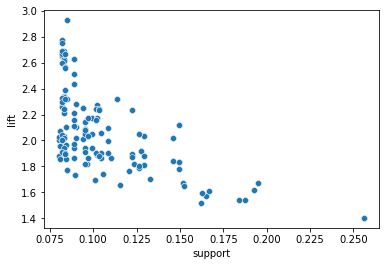

In [38]:
sns.scatterplot('support','lift',data=rules_metric_support)

In [39]:
rules_metric_support[(rules_metric_support['support']>0.12)&(rules_metric_support['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
48,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
49,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
76,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
81,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
84,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
85,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
90,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
91,(ArtBks),"(ChildBks, CookBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
96,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
97,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273


In [40]:
##Association Child books,Cook books and Geog Books is high

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='confidence'>

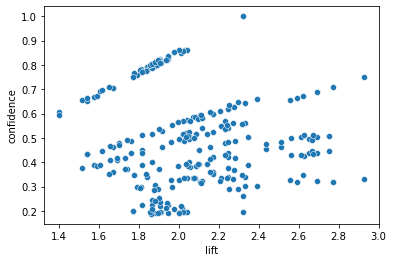

In [41]:
sns.scatterplot('lift','confidence',data=rules_metric_support)

In [42]:
rules_metric_support[(rules_metric_support['confidence']>0.7)&(rules_metric_support['lift']>2)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
32,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
59,"(YouthBks, RefBks)",(ChildBks),0.0965,0.423,0.0830,0.860104,2.033342,0.042181,4.124481
100,"(ItalCook, ChildBks)",(CookBks),0.0850,0.431,0.0850,1.000000,2.320186,0.048365,inf
103,(ItalCook),"(ChildBks, CookBks)",0.1135,0.256,0.0850,0.748899,2.925385,0.055944,2.962947
107,"(RefBks, DoItYBks)",(ChildBks),0.1055,0.423,0.0900,0.853081,2.016739,0.045373,3.927323
125,"(RefBks, GeogBks)",(ChildBks),0.1105,0.423,0.0940,0.850679,2.011061,0.047259,3.864152
185,"(YouthBks, ChildBks, DoItYBks)",(CookBks),0.0950,0.431,0.0820,0.863158,2.002687,0.041055,4.158077
186,"(YouthBks, CookBks, DoItYBks)",(ChildBks),0.0950,0.423,0.0820,0.863158,2.040562,0.041815,4.216538
190,"(YouthBks, DoItYBks)","(ChildBks, CookBks)",0.1155,0.256,0.0820,0.709957,2.773268,0.052432,2.565134
200,"(YouthBks, CookBks, GeogBks)",(ChildBks),0.0970,0.423,0.0830,0.855670,2.022861,0.041969,3.997786


In [43]:
#Association between ItalCook books and Cook books is high

***
We can conclude with rules from different support matric values that
1.Child books are highly associated with cook books,Geog Books 
2.Ital(Italian) Cook books  are highly associated with Cook books
3.child books are highly associated with YouthBooks ,DoItY books,Geog 
***

***
**Creating rule using Confidence metric**
***

In [44]:
rules_metric_confidence= association_rules(frequent_itemset,metric='confidence',min_threshold=0.1)
rules_metric_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1627,"(ChildBks, CookBks)","(YouthBks, ArtBks, GeogBks, DoItYBks)",0.2560,0.0395,0.031,0.121094,3.065665,0.020888,1.092836
1628,(YouthBks),"(GeogBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2475,0.0535,0.031,0.125253,2.341169,0.017759,1.082027
1629,(GeogBks),"(YouthBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0445,0.031,0.112319,2.524019,0.018718,1.076400
1630,(DoItYBks),"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

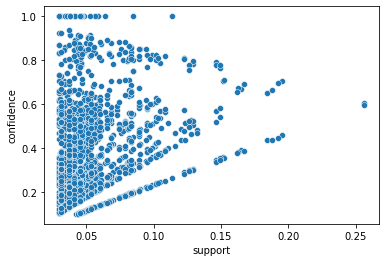

In [45]:
sns.scatterplot('support','confidence',data=rules_metric_confidence)

In [46]:
rules_metric_confidence[(rules_metric_confidence['support']>0.15) & (rules_metric_confidence['confidence']>0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.423,0.1650,0.666667,1.576044,0.060308,1.731000
2,(ChildBks),(CookBks),0.4230,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
5,(DoItYBks),(ChildBks),0.2820,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
6,(RefBks),(ChildBks),0.2145,0.423,0.1515,0.706294,1.669725,0.060767,1.964548
8,(ArtBks),(ChildBks),0.2410,0.423,0.1625,0.674274,1.594028,0.060557,1.771427
10,(GeogBks),(ChildBks),0.2760,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
17,(YouthBks),(CookBks),0.2475,0.431,0.1620,0.654545,1.518667,0.055328,1.647105
30,(DoItYBks),(CookBks),0.2820,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
31,(RefBks),(CookBks),0.2145,0.431,0.1525,0.710956,1.649549,0.060050,1.968556


In [47]:
#High association between
#Geog books and Child Books
#Cook books and Ref books

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

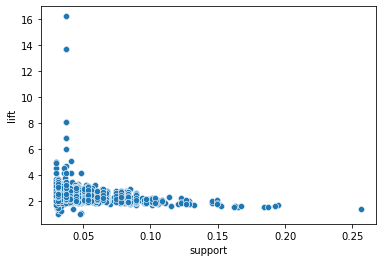

In [48]:
sns.scatterplot('support','lift',data=rules_metric_confidence)

In [49]:
rules_metric_confidence[(rules_metric_confidence['support']>0.12) & (rules_metric_confidence['lift']>2)]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
80,"(ChildBks, CookBks)",(YouthBks),0.2560,0.2475,0.1290,0.503906,2.035985,0.065640,1.516850
81,(YouthBks),"(ChildBks, CookBks)",0.2475,0.2560,0.1290,0.521212,2.035985,0.065640,1.553924
114,"(ChildBks, CookBks)",(DoItYBks),0.2560,0.2820,0.1460,0.570312,2.022385,0.073808,1.670982
119,(DoItYBks),"(ChildBks, CookBks)",0.2820,0.2560,0.1460,0.517730,2.022385,0.073808,1.542706
122,"(ChildBks, CookBks)",(RefBks),0.2560,0.2145,0.1225,0.478516,2.230842,0.067588,1.506277
123,(RefBks),"(ChildBks, CookBks)",0.2145,0.2560,0.1225,0.571096,2.230842,0.067588,1.734652
128,"(ChildBks, CookBks)",(ArtBks),0.2560,0.2410,0.1265,0.494141,2.050376,0.064804,1.500417
129,(ArtBks),"(ChildBks, CookBks)",0.2410,0.2560,0.1265,0.524896,2.050376,0.064804,1.565974
134,"(ChildBks, CookBks)",(GeogBks),0.2560,0.2760,0.1495,0.583984,2.115885,0.078844,1.740319
135,(GeogBks),"(ChildBks, CookBks)",0.2760,0.2560,0.1495,0.541667,2.115885,0.078844,1.623273


In [50]:
#Association between (CookBks, ChildBks)	(DoItYBks)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='confidence'>

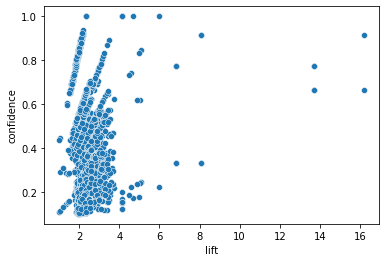

In [51]:
sns.scatterplot('lift','confidence',data=rules_metric_confidence)

In [52]:
rules_metric_confidence[(rules_metric_confidence['confidence']>0.8) & (rules_metric_confidence['lift']>6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
387,"(CookBks, ItalArt)",(ItalCook),0.041,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
1111,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.041,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
1117,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.041,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


In [53]:
#Association (ItalArt, CookBks)	(ItalCook, ArtBks)

In [54]:
rules_metric_confidence= association_rules(frequent_itemset,metric='confidence',min_threshold=0.8)
rules_metric_confidence

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.4310,0.1135,1.000000,2.320186,0.064582,inf
1,(ItalArt),(CookBks),0.0485,0.4310,0.0410,0.845361,1.961394,0.020096,3.679533
2,(ItalAtlas),(RefBks),0.0370,0.2145,0.0370,1.000000,4.662005,0.029063,inf
3,(ItalArt),(ArtBks),0.0485,0.2410,0.0485,1.000000,4.149378,0.036812,inf
4,"(YouthBks, DoItYBks)",(ChildBks),0.1155,0.4230,0.0950,0.822511,1.944470,0.046143,3.250902
...,...,...,...,...,...,...,...,...,...
131,"(GeogBks, ArtBks, CookBks, ItalCook)",(ChildBks),0.0360,0.4230,0.0300,0.833333,1.970055,0.014772,3.462000
132,"(GeogBks, ArtBks, ItalCook)","(ChildBks, CookBks)",0.0360,0.2560,0.0300,0.833333,3.255208,0.020784,4.464000
133,"(YouthBks, ArtBks, GeogBks, DoItYBks)",(CookBks),0.0395,0.4310,0.0370,0.936709,2.173338,0.019975,8.990200
134,"(YouthBks, GeogBks, DoItYBks, ArtBks, ChildBks)",(CookBks),0.0335,0.4310,0.0310,0.925373,2.147037,0.016561,7.624600


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

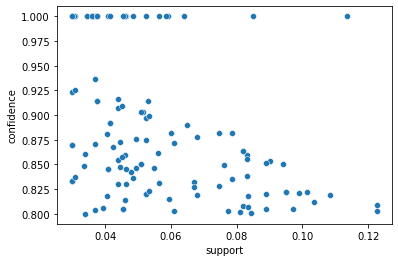

In [55]:
sns.scatterplot('support','confidence',data=rules_metric_confidence)

In [56]:
rules_metric_confidence[(rules_metric_confidence['support']>0.1) & (rules_metric_confidence['confidence']>0.8)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(CookBks),0.1135,0.431,0.1135,1.000000,2.320186,0.064582,inf
7,"(RefBks, ChildBks)",(CookBks),0.1515,0.431,0.1225,0.808581,1.876058,0.057204,2.972534
8,"(RefBks, CookBks)",(ChildBks),0.1525,0.423,0.1225,0.803279,1.899004,0.057993,2.933083
24,"(ArtBks, DoItYBks)",(CookBks),0.1235,0.431,0.1015,0.821862,1.906873,0.048272,3.194159
25,"(GeogBks, DoItYBks)",(CookBks),0.1325,0.431,0.1085,0.818868,1.899926,0.051392,3.141354
29,"(GeogBks, ArtBks)",(CookBks),0.1275,0.431,0.1035,0.811765,1.883445,0.048547,3.022812


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

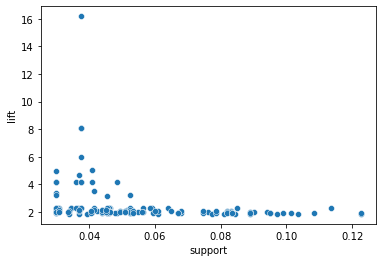

In [57]:
sns.scatterplot('support','lift',data=rules_metric_confidence)

In [58]:
rules_metric_confidence[(rules_metric_confidence['support']>0.04) & (rules_metric_confidence['lift']>4)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
3,(ItalArt),(ArtBks),0.0485,0.241,0.0485,1.000000,4.149378,0.036812,inf
32,"(CookBks, ItalArt)",(ArtBks),0.0410,0.241,0.0410,1.000000,4.149378,0.031119,inf
33,(ItalArt),"(ArtBks, CookBks)",0.0485,0.167,0.0410,0.845361,5.062041,0.032900,5.386733


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='confidence'>

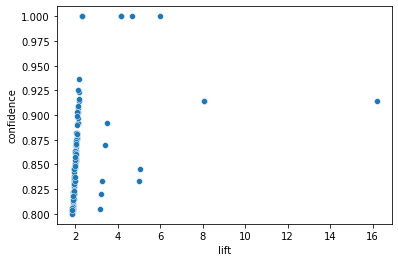

In [59]:
sns.scatterplot('lift','confidence',data=rules_metric_confidence)

In [60]:
rules_metric_confidence[(rules_metric_confidence['confidence']>0.8) & (rules_metric_confidence['lift']>5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
33,(ItalArt),"(ArtBks, CookBks)",0.0485,0.1670,0.0410,0.845361,5.062041,0.032900,5.386733
36,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
102,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
103,"(ItalCook, ItalArt)","(ArtBks, CookBks)",0.0375,0.1670,0.0375,1.000000,5.988024,0.031237,inf
104,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


In [61]:
#Good Association
#(ItalArt, CookBks, ArtBks)	(ItalCook)

***
We can conclude from different rules obtained with different confidence metric values that there is high association b/w:
1.Geog books and Child Books
2.Cook books and Ref books
3.CookBks, ChildBks and DoItYBks
4.ItalCook and ItalArt, CookBks, ArtBks
***

***
**Creating rule using lift metric**
***

In [62]:
rules_metric_lift = association_rules(frequent_itemset,metric='lift',min_threshold=0.1)
rules_metric_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1671,(GeogBks),"(YouthBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0445,0.031,0.112319,2.524019,0.018718,1.076400
1672,(DoItYBks),"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263
1673,(ArtBks),"(YouthBks, GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090
1674,(ChildBks),"(YouthBks, GeogBks, DoItYBks, ArtBks, CookBks)",0.4230,0.0370,0.031,0.073286,1.980704,0.015349,1.039156


In [63]:
rules_metric_lift = association_rules(frequent_itemset,metric='lift',min_threshold=0.5)
rules_metric_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1671,(GeogBks),"(YouthBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0445,0.031,0.112319,2.524019,0.018718,1.076400
1672,(DoItYBks),"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263
1673,(ArtBks),"(YouthBks, GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090
1674,(ChildBks),"(YouthBks, GeogBks, DoItYBks, ArtBks, CookBks)",0.4230,0.0370,0.031,0.073286,1.980704,0.015349,1.039156


In [64]:
rules_metric_lift = association_rules(frequent_itemset,metric='lift',min_threshold=1)
rules_metric_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(YouthBks),(ChildBks),0.2475,0.4230,0.165,0.666667,1.576044,0.060308,1.731000
1,(ChildBks),(YouthBks),0.4230,0.2475,0.165,0.390071,1.576044,0.060308,1.233750
2,(ChildBks),(CookBks),0.4230,0.4310,0.256,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.4310,0.4230,0.256,0.593968,1.404179,0.073687,1.421069
4,(ChildBks),(DoItYBks),0.4230,0.2820,0.184,0.434988,1.542511,0.064714,1.270770
...,...,...,...,...,...,...,...,...,...
1671,(GeogBks),"(YouthBks, DoItYBks, ArtBks, ChildBks, CookBks)",0.2760,0.0445,0.031,0.112319,2.524019,0.018718,1.076400
1672,(DoItYBks),"(YouthBks, GeogBks, ArtBks, ChildBks, CookBks)",0.2820,0.0465,0.031,0.109929,2.364066,0.017887,1.071263
1673,(ArtBks),"(YouthBks, GeogBks, DoItYBks, ChildBks, CookBks)",0.2410,0.0510,0.031,0.128631,2.522171,0.018709,1.089090
1674,(ChildBks),"(YouthBks, GeogBks, DoItYBks, ArtBks, CookBks)",0.4230,0.0370,0.031,0.073286,1.980704,0.015349,1.039156


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

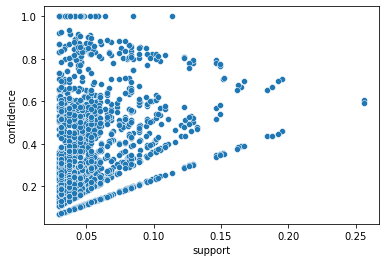

In [65]:
sns.scatterplot('support','confidence',data=rules_metric_lift)

In [66]:
rules_metric_lift[(rules_metric_lift['support']>0.18) & (rules_metric_lift['confidence']>0.5)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
2,(ChildBks),(CookBks),0.423,0.431,0.2560,0.605201,1.404179,0.073687,1.441240
3,(CookBks),(ChildBks),0.431,0.423,0.2560,0.593968,1.404179,0.073687,1.421069
5,(DoItYBks),(ChildBks),0.282,0.423,0.1840,0.652482,1.542511,0.064714,1.660347
10,(GeogBks),(ChildBks),0.276,0.423,0.1950,0.706522,1.670264,0.078252,1.966074
31,(DoItYBks),(CookBks),0.282,0.431,0.1875,0.664894,1.542677,0.065958,1.697968
36,(GeogBks),(CookBks),0.276,0.431,0.1925,0.697464,1.618245,0.073544,1.880766


In [67]:
#Found Association between
#(CokBks)	(ChildBks)
#(GeogBks)	(ChildBks)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

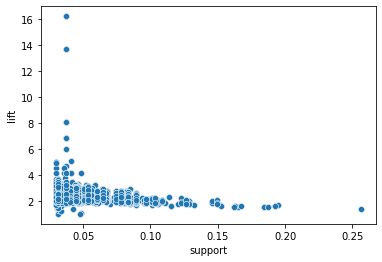

In [68]:
sns.scatterplot('support','lift',data=rules_metric_lift)

In [69]:
rules_metric_lift[(rules_metric_lift['support']>0.13) & (rules_metric_lift['lift']>2)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
116,"(ChildBks, CookBks)",(DoItYBks),0.256,0.282,0.1460,0.570312,2.022385,0.073808,1.670982
121,(DoItYBks),"(ChildBks, CookBks)",0.282,0.256,0.1460,0.517730,2.022385,0.073808,1.542706
136,"(ChildBks, CookBks)",(GeogBks),0.256,0.276,0.1495,0.583984,2.115885,0.078844,1.740319
137,(GeogBks),"(ChildBks, CookBks)",0.276,0.256,0.1495,0.541667,2.115885,0.078844,1.623273


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confidence', ylabel='lift'>

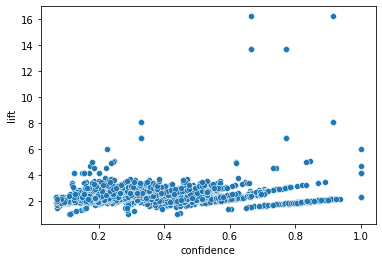

In [70]:
sns.scatterplot('confidence','lift',data=rules_metric_lift)

In [71]:
rules_metric_lift[(rules_metric_lift['confidence']>0.8) & (rules_metric_lift['lift']>6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
400,"(CookBks, ItalArt)",(ItalCook),0.041,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
1139,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.041,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
1145,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.041,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


In [72]:
rules_metric_lift = association_rules(frequent_itemset,metric='lift',min_threshold=6)
rules_metric_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(ItalCook),(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
1,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
2,"(ItalCook, CookBks)",(ItalArt),0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
3,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
4,(ItalCook),"(CookBks, ItalArt)",0.1135,0.0410,0.0375,0.330396,8.058451,0.032847,1.432191
5,(ItalArt),"(ItalCook, CookBks)",0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
6,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
7,"(ArtBks, ItalArt)",(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
8,(ItalCook),"(ArtBks, ItalArt)",0.1135,0.0485,0.0375,0.330396,6.812298,0.031995,1.420990
9,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

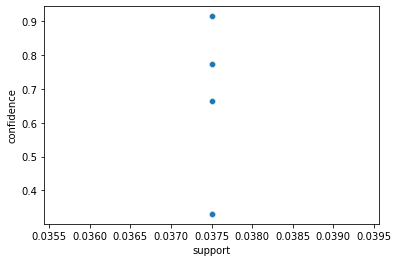

In [73]:
sns.scatterplot('support','confidence',data=rules_metric_lift)

In [74]:
rules_metric_lift[(rules_metric_lift['support']>0.03) & (rules_metric_lift['confidence']>0.6)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
1,(ItalArt),(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
3,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
5,(ItalArt),"(ItalCook, CookBks)",0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
6,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
7,"(ArtBks, ItalArt)",(ItalCook),0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659
9,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
10,"(ItalCook, ArtBks, CookBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
11,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
12,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763
14,"(ArtBks, ItalArt)","(ItalCook, CookBks)",0.0485,0.1135,0.0375,0.773196,6.812298,0.031995,3.908659


In [75]:
#Good Association
#(ItalArt, CookBks)	(ItalCook, ArtBks)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='lift'>

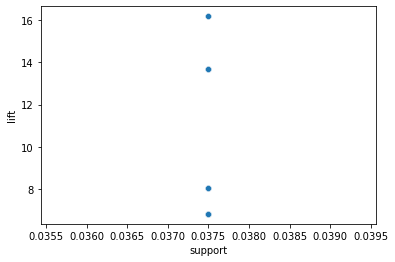

In [76]:
sns.scatterplot('support','lift',data=rules_metric_lift)

In [77]:
rules_metric_lift[(rules_metric_lift['support']>0.037) & (rules_metric_lift['lift']>14)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763
15,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='confidence'>

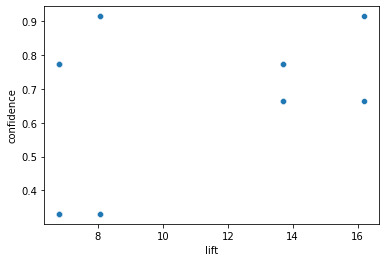

In [78]:
sns.scatterplot('lift','confidence',data=rules_metric_lift)

In [79]:
rules_metric_lift[(rules_metric_lift['confidence']>0.5) & (rules_metric_lift['lift']>14)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
12,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763
15,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


In [80]:
rules_metric_lift = association_rules(frequent_itemset,metric='lift',min_threshold=8)
rules_metric_lift

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
1,(ItalCook),"(CookBks, ItalArt)",0.1135,0.0410,0.0375,0.330396,8.058451,0.032847,1.432191
2,"(ItalCook, ArtBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
3,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
4,"(ItalCook, ArtBks, CookBks)",(ItalArt),0.0565,0.0485,0.0375,0.663717,13.684883,0.034760,2.829461
5,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
6,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763
7,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
8,(ItalCook),"(ArtBks, CookBks, ItalArt)",0.1135,0.0410,0.0375,0.330396,8.058451,0.032847,1.432191
9,(ItalArt),"(ItalCook, ArtBks, CookBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='support', ylabel='confidence'>

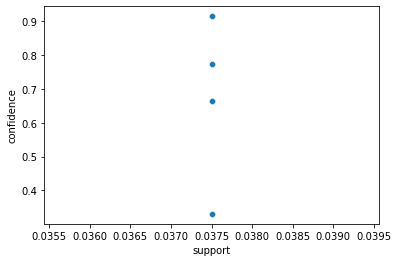

In [81]:
sns.scatterplot('support','confidence',data=rules_metric_lift)

In [82]:
rules_metric_lift[(rules_metric_lift['support']>0.037) & (rules_metric_lift['confidence']>0.7)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,"(CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
3,(ItalArt),"(ItalCook, ArtBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977
5,"(ArtBks, CookBks, ItalArt)",(ItalCook),0.0410,0.1135,0.0375,0.914634,8.058451,0.032847,10.384714
7,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429
9,(ItalArt),"(ItalCook, ArtBks, CookBks)",0.0485,0.0565,0.0375,0.773196,13.684883,0.034760,4.159977


In [85]:
rules_metric_lift[(rules_metric_lift['support']>0.037) & (rules_metric_lift['lift']>14)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
6,"(ItalCook, ArtBks)","(CookBks, ItalArt)",0.0565,0.0410,0.0375,0.663717,16.188215,0.035183,2.851763
7,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.0410,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='lift', ylabel='confidence'>

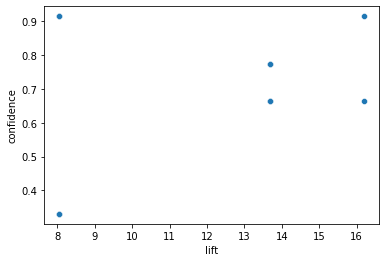

In [86]:
sns.scatterplot('lift','confidence',data=rules_metric_lift)

In [87]:
rules_metric_lift[(rules_metric_lift['confidence']>0.7) & (rules_metric_lift['lift']>14)]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
7,"(CookBks, ItalArt)","(ItalCook, ArtBks)",0.041,0.0565,0.0375,0.914634,16.188215,0.035183,11.052429


***
From all above rules with lift metric we can conclude high association between:
1.Cook book and Child book
2.(ItalArt, CookBks) and (ItalCook, ArtBks)
3.GeogBks and ChildBks

***

# From all above observations we can conclude that there is high association between:
**1.ChildBks-> Cook Bks and Geog Bks              
2..(ItalArt, CookBks) -> (ItalCook, ArtBks)             
3.ChildBks ->DoItY books,Geog Books**